In [8]:
from sympy import init_printing, symbols, sqrt, eye
init_printing()

In [9]:
from kinematics import V3D, FV, SpinorU, SpinorV
from sympy import sin, cos, I, pi, acos
from sympy import Dummy
from sympy.physics.matrices import mgamma


## $Z \to ff$

### kinematics

In [6]:
mZ = symbols('m_Z', positive=True)
E = symbols(r'E', positive=True)
th = V3D.th
phi = V3D.phi

In [7]:
px, py, pz = E*sin(th), 0, E*cos(th)
p3 = V3D(px, py, pz)
p4 = V3D(-px, py, -pz)


In [10]:
pmu1 = FV(mZ, 0, 0, 0)
pmu3 = FV(E, p3.px, p3.py, p3.pz)
pmu4 = FV(E, p4.px, p4.py, p4.pz)

In [6]:
pmu3, pmu4

### Massive W at rest polarizations along the z axis

In [11]:
eps_minus = FV(0, 1/sqrt(2), -I/sqrt(2), 0)
eps_L = FV(0, 0, 0, 1) # Z boson at rest
eps_plus = FV(0, -1/sqrt(2), -I/sqrt(2), 0)

In [13]:
def polarization(type):
    if type == 1:
        out = eps_plus
    elif type == -1:
        out = eps_minus
    elif type == 0:
        out = eps_L
    else:
        raise ValueError("type must be 1, -1 or 0")
    return out

In [14]:
mf = symbols(r'm_f', positive=True)
u3 = lambda s3:SpinorU(pmu3, mf, s3)
v4 = lambda s4:SpinorV(pmu4, mf, s4)
I4x4 = eye(4)

In [16]:

positive_f_plus = Dummy(positive=True)
positive_f_minus = Dummy(positive=True)

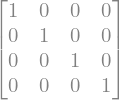

In [20]:
helicities = [1, -1]
cV, cA = symbols('c_V, c_A', real=True)
I4x4

In [23]:
JVA = cV*I4x4 - cA*mgamma(5)

In [24]:
Jmu = lambda nu, s3, s4: (
    (u3(s3).adj()*mgamma(nu, lower=True)*JVA*v4(s4).matrixform())
    )[0].subs(acos(cos(th)), th).subs(acos(-cos(th)), th + pi).subs(
        {
            E + mf:positive_f_plus,
            E - mf: positive_f_minus
        }
        ).subs(
            {
                positive_f_plus: E + mf,
                positive_f_minus: E - mf
            }
        )
Jmu(0,1,1).simplify() #I4x4 - mgamma(5)

In [25]:
for mu in range(4):
    display(Jmu(mu,-1,1).subs(mf,0).simplify())

In [136]:
gZ = symbols('g_Z', positive=True)
def M_polarization(pol_type, J):
    eps = polarization(pol_type).matrixform()
    factor = gZ/2
    J0 = eps[0]*(
        J(0,1,1) - 
        J(0, -1, -1) - 
        J(0, 1, -1) - 
        J(0, -1, 1)
        )
    J1 = eps[1]*(
        J(1,1,1) - 
        J(1, -1, -1) - 
        J(1, 1, -1) - 
        J(1, -1, 1)
        )
    J2 = eps[2]*(
        J(2,1,1) - 
        J(2, -1, -1) - 
        J(2, 1, -1) - 
        J(2, -1, 1)
        )
    J3 = eps[3]*(
        J(3,1,1) - 
        J(3, -1, -1) - 
        J(3, 1, -1) - 
        J(3, -1, 1)
        )
    return factor*(J0 + J1 + J2 + J3)

In [137]:
high_energy_limit = {
                    mf:0
                }

In [138]:
M_plus = M_polarization(1,Jmu).subs(E, mZ/2).simplify()
M_L = M_polarization(0,Jmu).subs(E, mZ/2).simplify()
M_minus = M_polarization(-1,Jmu).subs(E, mZ/2).simplify()

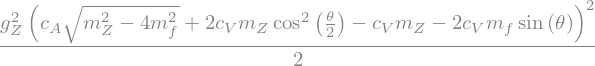

In [139]:
M_minus_square = M_minus.factor()**2
M_minus_square

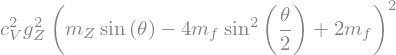

In [140]:
M_L_square = M_L.factor()**2
M_L_square


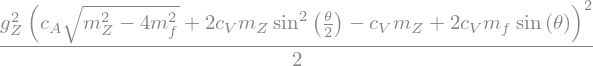

In [141]:
M_plus_square = M_plus.factor()**2
M_plus_square

In [142]:
from sympy import integrate

In [143]:
Ga_minus = integrate(
    M_minus_square.subs(E, mZ/2)*sin(th), (th, 0, pi), (phi, 0, 2*pi))
Ga_L = integrate(
    M_L_square.subs(E, mZ/2)*sin(th), (th, 0, pi), (phi, 0, 2*pi))
Ga_plus = integrate(
    M_plus_square.subs(E, mZ/2)*sin(th), (th, 0, pi), (phi, 0, 2*pi))

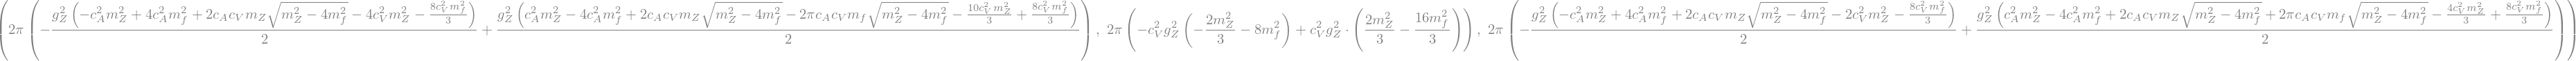

In [144]:
Ga_minus, Ga_L, Ga_plus

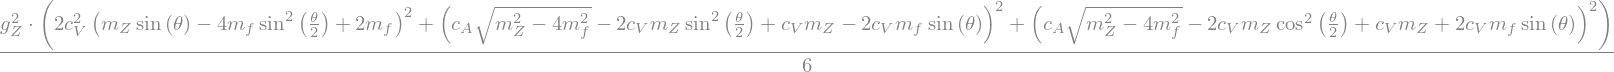

In [145]:
M_ave = ((M_L_square + M_plus_square + M_minus_square)/3).simplify()
M_ave

In [146]:
cL, cR = symbols('c_L, c_R', positive=True)
subs_cVA = {
    cV:cL + cR,
    cA:cL - cR
}

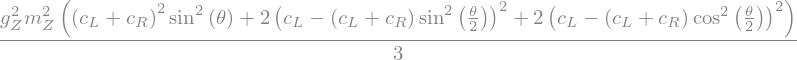

In [147]:
M_ave.subs(mf,0).subs(subs_cVA).simplify()

In [148]:
mZ_val = 91.1876 # GeV
me_val = 0.000511 # GeV
mmu_val = 0.105 #GeV
mtau_val = 1.777 # GeV

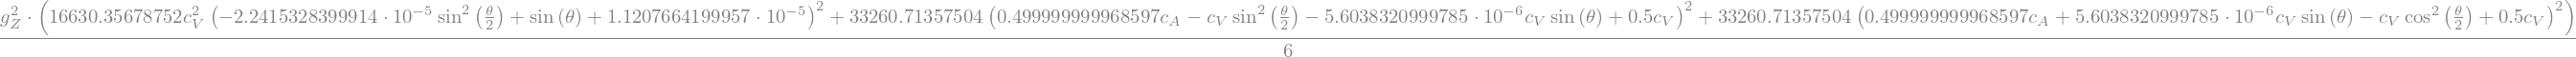

In [149]:
M_ave.subs(
    {mZ:mZ_val, mf:me_val}
)

In [150]:
width_Wlnu = integrate(
    (M_ave*mZ/2)/(32*pi**2*mZ**2)*sin(th), (th, 0, pi), (phi, 0, 2*pi)
)

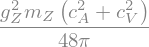

In [151]:
width_Wlnu.subs(high_energy_limit).simplify()